# Bank Marketing (with social/economic context)

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable (_y_) marked 'yes', otherwise 'no'

Downloaded from https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset


In [75]:
import pandas as pd
import plotly.express as px
#%matplotlib inline
import matplotlib.pyplot as plt

# Load Data

In [2]:
 df = pd.read_csv("../data/clean/bank-additional-full_cleaned.csv")

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
df.shape

(41176, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Feature Exploration

**Overal Statistic**

In [6]:
for column in df.columns:
    print('Statistic for', column)
    print(df[column].describe())
    print('---------------------')

Statistic for age
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
---------------------
Statistic for job
count      41176
unique        12
top       admin.
freq       10419
Name: job, dtype: object
---------------------
Statistic for marital
count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
---------------------
Statistic for education
count                 41176
unique                    8
top       university.degree
freq                  12164
Name: education, dtype: object
---------------------
Statistic for default
count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object
---------------------
Statistic for housing
count     41176
unique        3
top         yes
freq      21571
Name: housing, dtype: object
---------------------
Statistic for loan
count 

### Proportion of the customers who made the deposit after the campaign and who don\'t.

In [88]:
#count the values for 'yes' and 'no'
yes = df[df.y == 1].y.value_counts().tolist()
no = df[df.y == 0].y.value_counts().tolist()

In [90]:
#create a new temporary data frame
data= {'YES_deposit': yes, 'NO_deposit': no}
yes_no = pd.DataFrame(data, columns = ['YES_deposit', 'NO_deposit'])
yes_no

,YES_deposit,NO_deposit
0,4639,36537


In [111]:
#calcucalte few vars for the bar
efficiency = (yes[0]/no[0]) * 100
efficiency_rounded = round(efficiency, 2)
customers_involved  = df.shape[0]

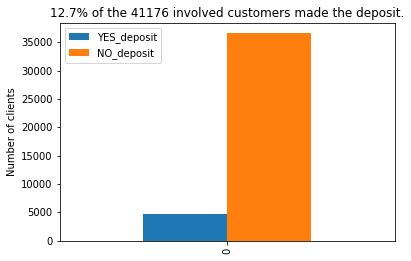

In [112]:
#plot a bar
yes_no.plot(kind="bar")
plt.title('{}% of the {} involved customers made the deposit.'.format(efficiency_rounded,customers_involved))
plt.ylabel('Number of clients')
plt.show();

### Some people were contacted only during this campaign, some also before. Is there an impact on the deposit decision?

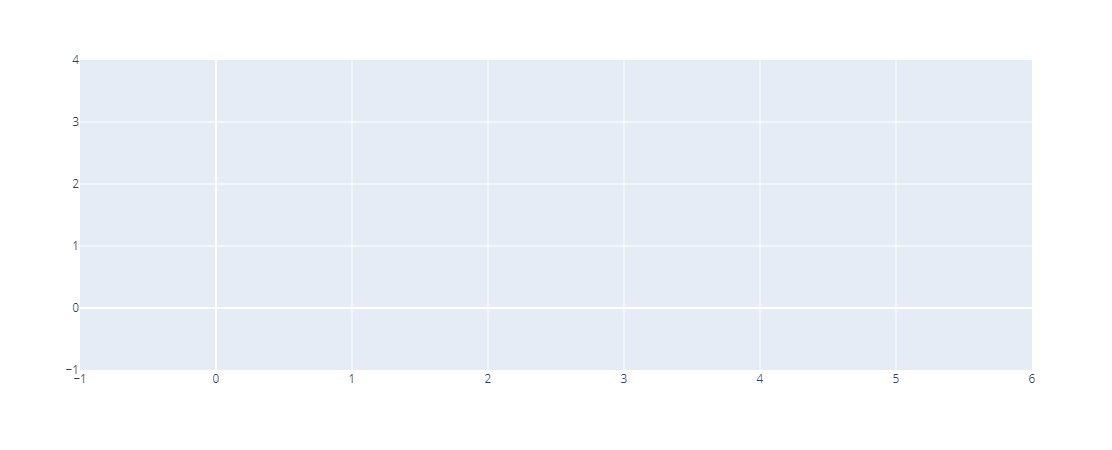

In [62]:
#fig = px.bar(data_frame=temp)
#fig.show()

In [9]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

First, we should split *previous contacts* into two groups: 
 - previous campaign
 - all previous contacts (obviously including the previous campaign
 

In [10]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [11]:
# Convert target variable into numeric (code used from the VolodymyrGavrysh accomplished Task)
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000808,0.004622,-0.034381,0.032101,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
duration,-0.000808,1.000000,-0.071765,-0.047556,0.040683,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297
campaign,0.004622,-0.071765,1.000000,0.052606,-0.045612,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.867710,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.032101,0.040683,-0.045612,-0.867710,1.000000,-0.225375,-0.022398,0.069441,-0.262706,-0.349132,0.293006
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.225375,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.022398,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,0.069441,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.262706,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.349132,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669
